In [1]:
from donaldson import *
import fermat_quintic as fq
import cProfile as cp
import itertools
import matplotlib.pyplot as plt 
import matplotlib.lines as lines

In [2]:
k_1 = 1 
k_2 = 2
h_bal_1 = donaldson(k=k_1, max_iterations=15)
h_bal_2 = donaldson(k=k_2, max_iterations=15)
points = fq.sample_quintic_points(8000)
g_det_k = lambda k, h_bal : np.vectorize(lambda p : np.linalg.det(fq.pull_back(k, h_bal, p)), 
                                    signature='(m)->()')
g_1 = g_det_k(k_1, h_bal_1)(points)
g_2 = g_det_k(k_2, h_bal_2)(points)

In [3]:
g_1

array([0.00111421+1.57621757e-19j, 0.00802402+2.22711401e-19j,
       0.00050092+2.05856909e-21j, ..., 0.20169634-8.55356293e-16j,
       0.00242205-6.46333812e-20j, 0.00110552-2.24646177e-20j])

In [4]:
k_1 = 2 
k_2 = 3
h_bal_1 = donaldson(k=k_1, max_iterations=15)
h_bal_2 = donaldson(k=k_2, max_iterations=15)
g_2 = g_det_k(k_1, h_bal_1)(points)
g_3 = g_det_k(k_2, h_bal_2)(points)

In [9]:
g_3

array([0.00153806-3.66258274e-20j, 0.00911542-1.89752817e-18j,
       0.00061978+5.76256328e-19j, ..., 0.30950214-4.97131058e-15j,
       0.00122105+1.46319079e-19j, 0.00149188+5.62946568e-20j])

TypeError: cannot unpack non-iterable AxesSubplot object

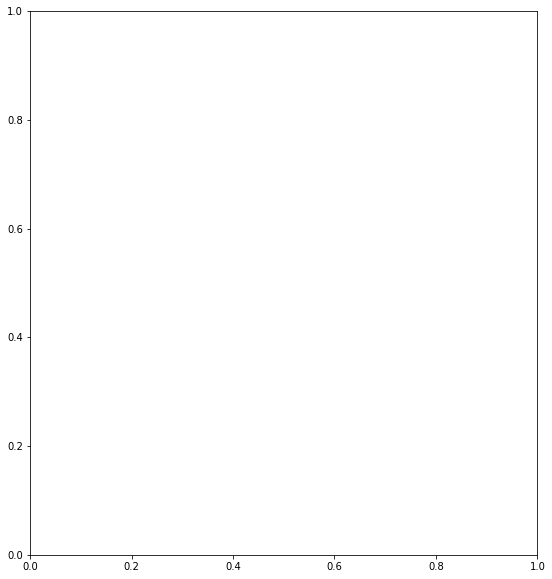

In [21]:

fig, ax = plt.subplots(figsize=(20,10))
xy_line = lines.Line2D([0, 1], [0, 1], color='red', linestyle='--', 
                       linewidth=1.5, figure=fig)
xy_line.set_transform(ax.transAxes)


fig, ax = plt.subplot(1, 2, 1)
ax.add_line(xy_line)
plt.scatter(np.real(g_2), np.real(g_1), color='blue', marker='o', s=2)
plt.xlabel(r'$g^{(2)}|_p$') 
plt.ylabel(r'$g^{(1)}|_p$') 
plt.xlim(0, .004)
plt.ylim(0, .004)
plt.title(r'$g^{(1)}|_p$ vs. $g^{(2)}|_p$') 

plt.subplot(1, 2, 2)
ax.add_line(xy_line)
plt.scatter(np.real(g_3), np.real(g_2), color='blue', marker='o', s=2)
plt.xlabel(r'$g^{(3)}|_p$') 
plt.ylabel(r'$g^{(2)}|_p$') 
plt.xlim(0, .004)
plt.ylim(0, .004)

plt.title(r'$g^{(2)}|_p$ vs. $g^{(3)}|_p$') 
plt.show()